In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
import re
from itertools import product

plt.rcParams.update({
    'font.size': 16,          # Base font size
})
bohr_to_angstrom = 0.52917721067

# Path to your repo (adjust this)
repo_path = "/home/x_pamca/postdoc_proj/EMTO_input_automation"

# Add it to sys.path if not already there
if repo_path not in sys.path:
    sys.path.append(repo_path)

from modules.dos import DOSParser, DOSPlotter


In [4]:
dos_file = f'fept_0.96_2.86_k21.dos'

parser = DOSParser(dos_file)
plotter = DOSPlotter(parser)

In [28]:
totup, totdown = parser.get_dos(data_type='total')

ptup, ptdown = parser.get_dos(data_type='sublattice', sublattice=1)
feup, fedown = parser.get_dos(data_type='sublattice', sublattice=2)

ptup_sub, ptdown_sub = parser.get_ITA_dos(sublattice=1, orbital='total', sum_ITAs=True, concentrations=[0,1])
feup_sub, fedown_sub = parser.get_ITA_dos(sublattice=2, orbital='total', sum_ITAs=True, concentrations=[0,1])

totup_sum = np.add(ptup_sub[:,1],feup_sub[:,1])
totdown_sum = np.add(ptdown_sub[:,1],fedown_sub[:,1])


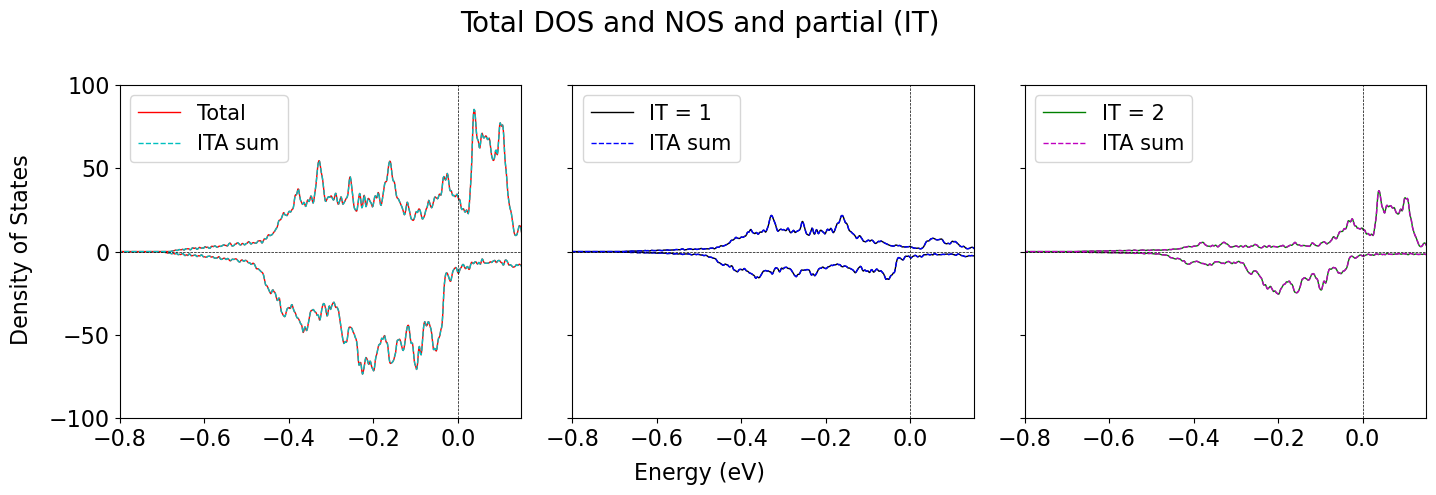

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# --- Subplot 1: Total DOS ---
# Plot total DOS from parser (reference - should match calculated total)
axes[0].plot(totup[:,0], -1*totup[:,1], 'r-', label='Total', linewidth=1)
axes[0].plot(totdown[:,0], totdown[:,1], 'r-', linewidth=1)

axes[0].plot(feup_sub[:,0], -2*totup_sum, 'c--', label='ITA sum', linewidth=1)
axes[0].plot(feup_sub[:,0], 2*totdown_sum, 'c--', linewidth=1)


axes[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[0].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[0].set_xlim([-0.8, 0.15])
axes[0].set_ylim([-100, 100])
axes[0].legend(fontsize=15)


# --- Subplot 2: PDOS Pt ---
axes[1].plot(ptup[:,0], -1*ptup[:,1], 'k-', label='IT = 1', linewidth=1)
axes[1].plot(ptdown[:,0], ptdown[:,1], 'k-', linewidth=1)

axes[1].plot(ptup_sub[:,0], -1*ptup_sub[:,1], 'b--', label='ITA sum', linewidth=1)
axes[1].plot(ptdown_sub[:,0], ptdown_sub[:,1], 'b--', linewidth=1)


axes[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[1].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[1].set_xlim([-0.8, 0.15])
axes[1].legend(fontsize=15)

# --- Subplot 3: PDOS Fe ---
axes[2].plot(feup[:,0], -1*feup[:,1], 'g-', label='IT = 2', linewidth=1)
axes[2].plot(fedown[:,0], fedown[:,1], 'g-', linewidth=1)

axes[2].plot(feup_sub[:,0], -1*feup_sub[:,1], 'm--', label='ITA sum', linewidth=1)
axes[2].plot(fedown_sub[:,0], fedown_sub[:,1], 'm--', linewidth=1)

axes[2].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[2].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[2].set_xlim([-0.8, 0.15])
axes[2].legend(fontsize=15)

# Shared labels
fig.text(0.5, 0.04, 'Energy (eV)', ha='center')
fig.text(0.04, 0.5, 'Density of States', va='center', rotation='vertical')

fig.suptitle("Total DOS and NOS and partial (IT)", fontsize=20)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()